In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
print(os.listdir("./data/avocado.csv/"))

['avocado.csv']


In [2]:
#데이터 값을 불러오고 그에 대한 정보를 확인합니다 
avocado = pd.read_csv("./data/avocado.csv/avocado.csv",index_col="year")
print("shape->", avocado.shape)
avocado.describe()

shape-> (18249, 13)


,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000


In [3]:
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
year,,,,,,,,,,,,,
2015,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
2015,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2015,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
2015,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
2015,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany


In [4]:
#콜롬에 어떤 값이 있는지 확인합니다 
avocado.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'region'],
      dtype='object')

In [5]:
# 아보카도가 어디서 왔는지 정보를 표시해 줍니다
avocado.region

year
2015              Albany
2015              Albany
2015              Albany
2015              Albany
2015              Albany
2015              Albany
2015              Albany
2015              Albany
2015              Albany
2015              Albany
2015              Albany
2015              Albany
2015              Albany
2015              Albany
2015              Albany
2015              Albany
2015              Albany
2015              Albany
2015              Albany
2015              Albany
2015              Albany
2015              Albany
2015              Albany
2015              Albany
2015              Albany
2015              Albany
2015              Albany
2015              Albany
2015              Albany
2015              Albany
              ...       
2018             TotalUS
2018             TotalUS
2018             TotalUS
2018             TotalUS
2018             TotalUS
2018             TotalUS
2018                West
2018                West
2018                

In [6]:
#각각의 정보가 얼마나 어디서 왔는지 확인해 줍니다 
avocado.region.value_counts()

Southeast              338
SanDiego               338
Denver                 338
NewYork                338
NewOrleansMobile       338
Roanoke                338
Boise                  338
Albany                 338
LosAngeles             338
Louisville             338
Charlotte              338
Columbus               338
Tampa                  338
Syracuse               338
SanFrancisco           338
GreatLakes             338
NorthernNewEngland     338
Midsouth               338
TotalUS                338
Boston                 338
CincinnatiDayton       338
GrandRapids            338
SouthCentral           338
Pittsburgh             338
Seattle                338
Northeast              338
HarrisburgScranton     338
Sacramento             338
DallasFtWorth          338
Orlando                338
Plains                 338
Jacksonville           338
Atlanta                338
Nashville              338
RichmondNorfolk        338
West                   338
RaleighGreensboro      338
P

In [7]:
#여기서 target 인 y를 지정해주고 그리고 쓸만한 값만 x로 지정해주빈다 
y = avocado.AveragePrice
X= avocado[['Date',"Total Volume","region"]]
print(X.head())

            Date  Total Volume  region
year                                  
2015  2015-12-27      64236.62  Albany
2015  2015-12-20      54876.98  Albany
2015  2015-12-13     118220.22  Albany
2015  2015-12-06      78992.15  Albany
2015  2015-11-29      51039.60  Albany


In [8]:
#특정한 지역에 있는 것만 골라낸다 
avocado[avocado.region.isin(["SanDiego","Chicago"])].head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
year,,,,,,,,,,,,,
2015,0,2015-12-27,0.93,661137.13,42799.00,445218.79,78378.25,94741.09,83066.75,1617.67,10056.67,conventional,Chicago
2015,1,2015-12-20,0.91,690669.34,35724.99,464574.15,96306.30,94063.90,76241.25,9592.65,8230.00,conventional,Chicago
2015,2,2015-12-13,1.07,668601.50,40380.09,451470.42,94162.53,82588.46,76829.42,5693.75,65.29,conventional,Chicago
2015,3,2015-12-06,1.14,664020.49,53173.18,455048.11,92888.37,62910.83,62473.12,420.95,16.76,conventional,Chicago
2015,4,2015-11-29,1.11,602481.22,42851.47,422479.32,74988.97,62161.46,61862.57,298.89,0.00,conventional,Chicago
2015,5,2015-11-22,0.94,751897.89,34868.50,553545.31,89732.33,73751.75,73457.31,294.44,0.00,conventional,Chicago
2015,6,2015-11-15,1.17,641881.96,31286.11,441753.60,93857.48,74984.77,74723.66,261.11,0.00,conventional,Chicago
2015,7,2015-11-08,1.01,711146.61,44528.42,498562.41,101889.32,66166.46,65842.08,324.38,0.00,conventional,Chicago
2015,8,2015-11-01,1.00,807041.46,69420.04,562214.56,106536.92,68869.94,68447.93,422.01,0.00,conventional,Chicago


In [9]:
#특정 지역에만 groupby 해줄수도 있다 
avocado.groupby('region').sum()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
region,,,,,,,,,,
Albany,8192,527.63,1.606780e+07,6.165396e+05,1.271597e+07,5.503733e+04,2.680255e+06,2.246945e+06,3.898817e+05,43429.16
Atlanta,8192,452.23,8.860512e+07,4.938750e+07,1.055186e+07,1.052484e+05,2.856051e+07,1.744274e+07,1.083968e+07,278101.68
BaltimoreWashington,8192,518.57,1.347139e+08,1.205180e+07,8.314222e+07,4.213755e+06,3.530615e+07,3.411761e+07,9.815468e+05,206985.36
Boise,8192,455.67,1.441319e+07,6.766594e+06,1.170049e+06,1.077134e+06,5.399412e+06,4.677933e+06,7.110283e+05,10449.34
Boston,8192,517.44,9.727398e+07,1.688178e+06,7.240631e+07,1.684016e+06,2.149548e+07,1.991043e+07,1.500167e+06,84879.99
BuffaloRochester,8192,512.69,2.296247e+07,6.005149e+05,1.070242e+07,4.878556e+04,1.161075e+07,1.026843e+07,1.260419e+06,81901.94
California,8192,471.62,1.028982e+09,3.989670e+08,3.514914e+08,3.184105e+07,2.466822e+08,2.290977e+08,1.231194e+07,5272577.91
Charlotte,8192,542.84,3.555554e+07,7.563811e+06,1.238027e+07,3.913522e+06,1.169794e+07,1.064385e+07,9.844872e+05,69603.59
Chicago,8192,526.19,1.337023e+08,1.084408e+07,8.602744e+07,1.996539e+07,1.686540e+07,1.479465e+07,1.691875e+06,378872.71


## Data cleaning 
Basic 데이터를 정제하는법을 해본다

In [10]:
avocado.isnull()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
year,,,,,,,,,,,,,
2015,False,False,False,False,False,False,False,False,False,False,False,False,False
2015,False,False,False,False,False,False,False,False,False,False,False,False,False
2015,False,False,False,False,False,False,False,False,False,False,False,False,False
2015,False,False,False,False,False,False,False,False,False,False,False,False,False
2015,False,False,False,False,False,False,False,False,False,False,False,False,False
2015,False,False,False,False,False,False,False,False,False,False,False,False,False
2015,False,False,False,False,False,False,False,False,False,False,False,False,False
2015,False,False,False,False,False,False,False,False,False,False,False,False,False
2015,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
# avocado 값중에 한가지라도 null값이 있으면 cols missing 값을 채운다 
cols_missing = [col for col in avocado.columns if avocado[col].isnull().any()]
X = X.drop(cols_missing, axis=1)
print(cols_missing)
#test = train.drop(cols_missing, axis=1)

[]


In [12]:
# Data augmentation 
avocado.apply(lambda n : n /2 if n.dtype=='float' else n, axis='columns')

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
year,,,,,,,,,,,,,
2015,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,Albany
2015,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,Albany
2015,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,Albany
2015,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,Albany
2015,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,Albany
2015,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00,conventional,Albany
2015,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00,conventional,Albany
2015,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00,conventional,Albany
2015,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00,conventional,Albany


In [13]:
columns = avocado.columns
names = {'AveragePrice':'price', 'Total Volume':'volume', 'Total Bags':'bags'}
avocado = avocado.rename(columns = names)

In [14]:
#create Custom column
avocado.assign(rate=(avocado.price/avocado.volume))

,Unnamed: 0,Date,price,volume,4046,4225,4770,bags,Small Bags,Large Bags,XLarge Bags,type,region,rate
year,,,,,,,,,,,,,,
2015,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,Albany,2.070470e-05
2015,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,Albany,2.460048e-05
2015,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,Albany,7.866675e-06
2015,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,Albany,1.367224e-05
2015,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,Albany,2.507857e-05
2015,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00,conventional,Albany,2.250813e-05
2015,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00,conventional,Albany,1.186286e-05
2015,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00,conventional,Albany,8.955633e-06
2015,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00,conventional,Albany,1.021927e-05


In [15]:
avocado.head()

,Unnamed: 0,Date,price,volume,4046,4225,4770,bags,Small Bags,Large Bags,XLarge Bags,type,region
year,,,,,,,,,,,,,
2015,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
2015,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2015,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
2015,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
2015,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany


# Visualization

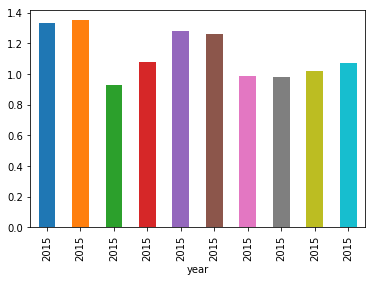

In [16]:
avocado.price.head(10).plot.bar()

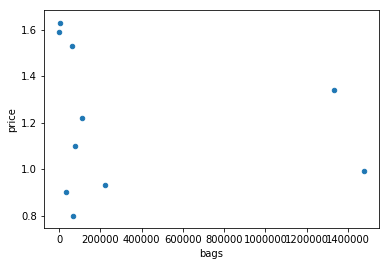

In [18]:
avocado.sample(10).plot.scatter(x="bags", y="price")

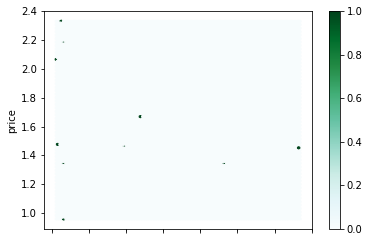

In [19]:
avocado.sample(10).plot.hexbin(x="bags", y="price")

# Prediction

In [57]:
def fit(X, y):
    train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=1)
    model = DecisionTreeRegressor(random_state=1)
    model.fit(train_X, train_y)
    pred_y = model.predict(test_X)
    mae = mean_absolute_error(test_y, pred_y)
    return model, mae

In [58]:
def formatting(d, nf, cf, tr=[]):
    """
    nf = numerical features
    cf = categolical features
    One stop function for
    - Drop NaN
    - One-hot encoding
    """
    
    # Drop NaN
    d = d[nf + cf + tr]
    d = d.dropna(axis=0)
    
    # One-hot encoding
    num_df = d[nf]
    cat_df = pd.get_dummies(d[cf])
    X = pd.concat([num_df, cat_df], axis=1)
    if len(tr) != 0:
        y = d[tr]
    else:
        y = None
    return X, y

In [59]:
train = avocado
nf = avocado['bags']
cf = avocado['region']
tr = avocado['price']
#X, y = formatting(train, nf, cf, tr)

In [60]:
#d = avocado[nf + cf+ tr]
#d = d.dropna(axis=0)
#print(d)
#cat_df = pd.get_dummies(d[cf])
d = avocado[['bags','region','price']]
d.dropna(axis=0)
num_df = d['bags']
cat_df = pd.get_dummies(d['region'])
X = pd.concat([num_df,cat_df],axis=1)
y = d['price']
#d = avocado[nf + tr]

In [61]:
model,mae = fit(X,y)
print(mae)

0.22306048652202498
